# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from jcopml.plot import plot_missing_value
from jcopml.utils import save_model, load_model
from jcopml.automl import AutoClassifier
from jcopml.feature_importance import mean_score_decrease

# 2. Import Dataset

In [2]:
df = pd.read_csv("mobile.csv")
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.shape

(2000, 21)

In [5]:
pd.options.display.max_columns = 100

In [6]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

### Data Description

In [7]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

### Plot the Missing Value

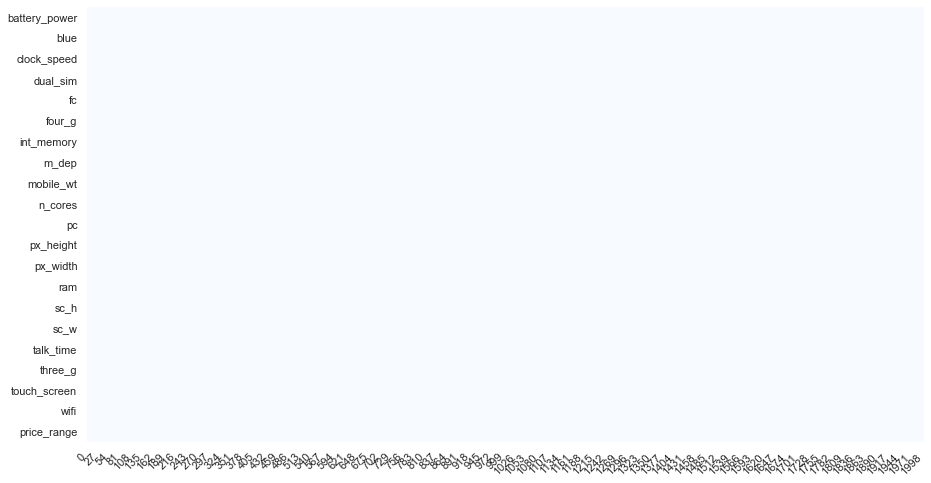

In [8]:
plot_missing_value(df)

## Target Distribution

<AxesSubplot:xlabel='price_range', ylabel='count'>

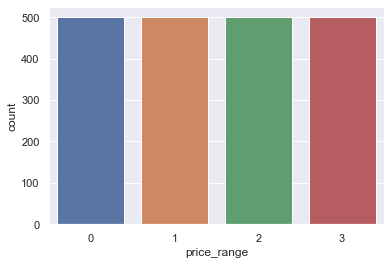

In [9]:
sns.countplot(df['price_range'])

### Plot Multiple Pairwise Bivariate Distributions

In [10]:
feature1 = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc','price_range']]
feature2 = df[['px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']]

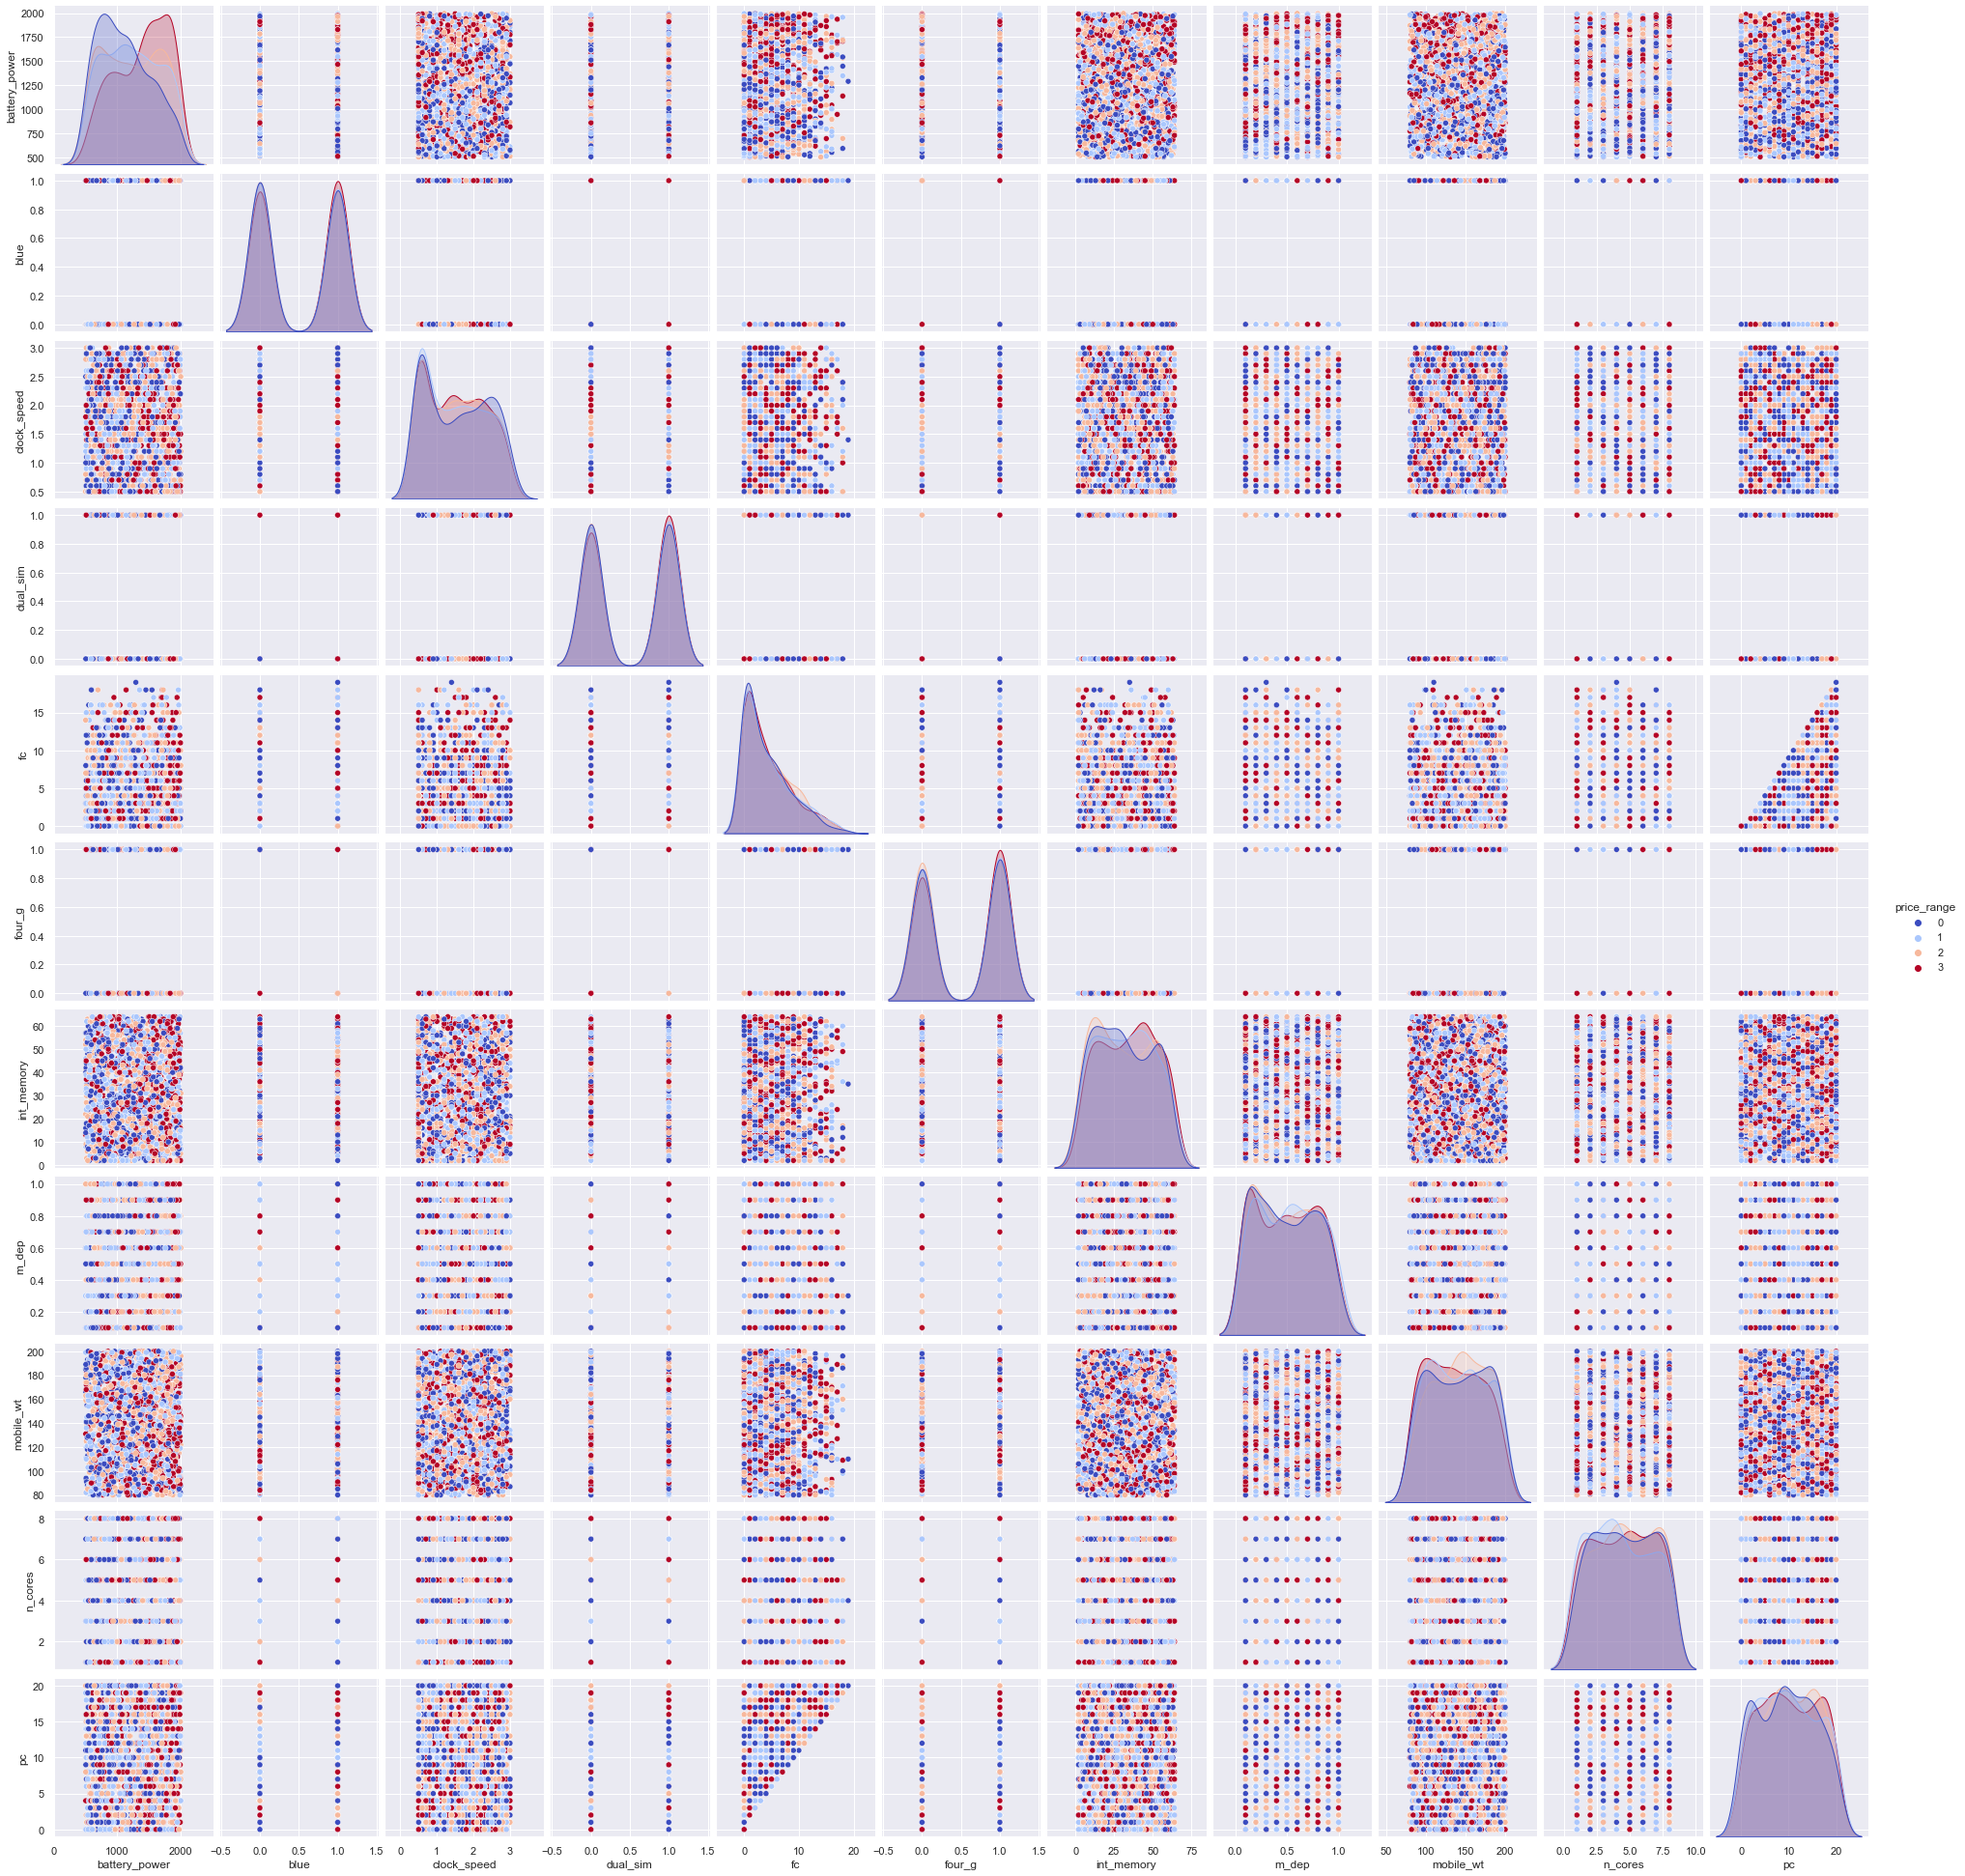

In [11]:
sns.pairplot(feature1,hue='price_range', palette='coolwarm')

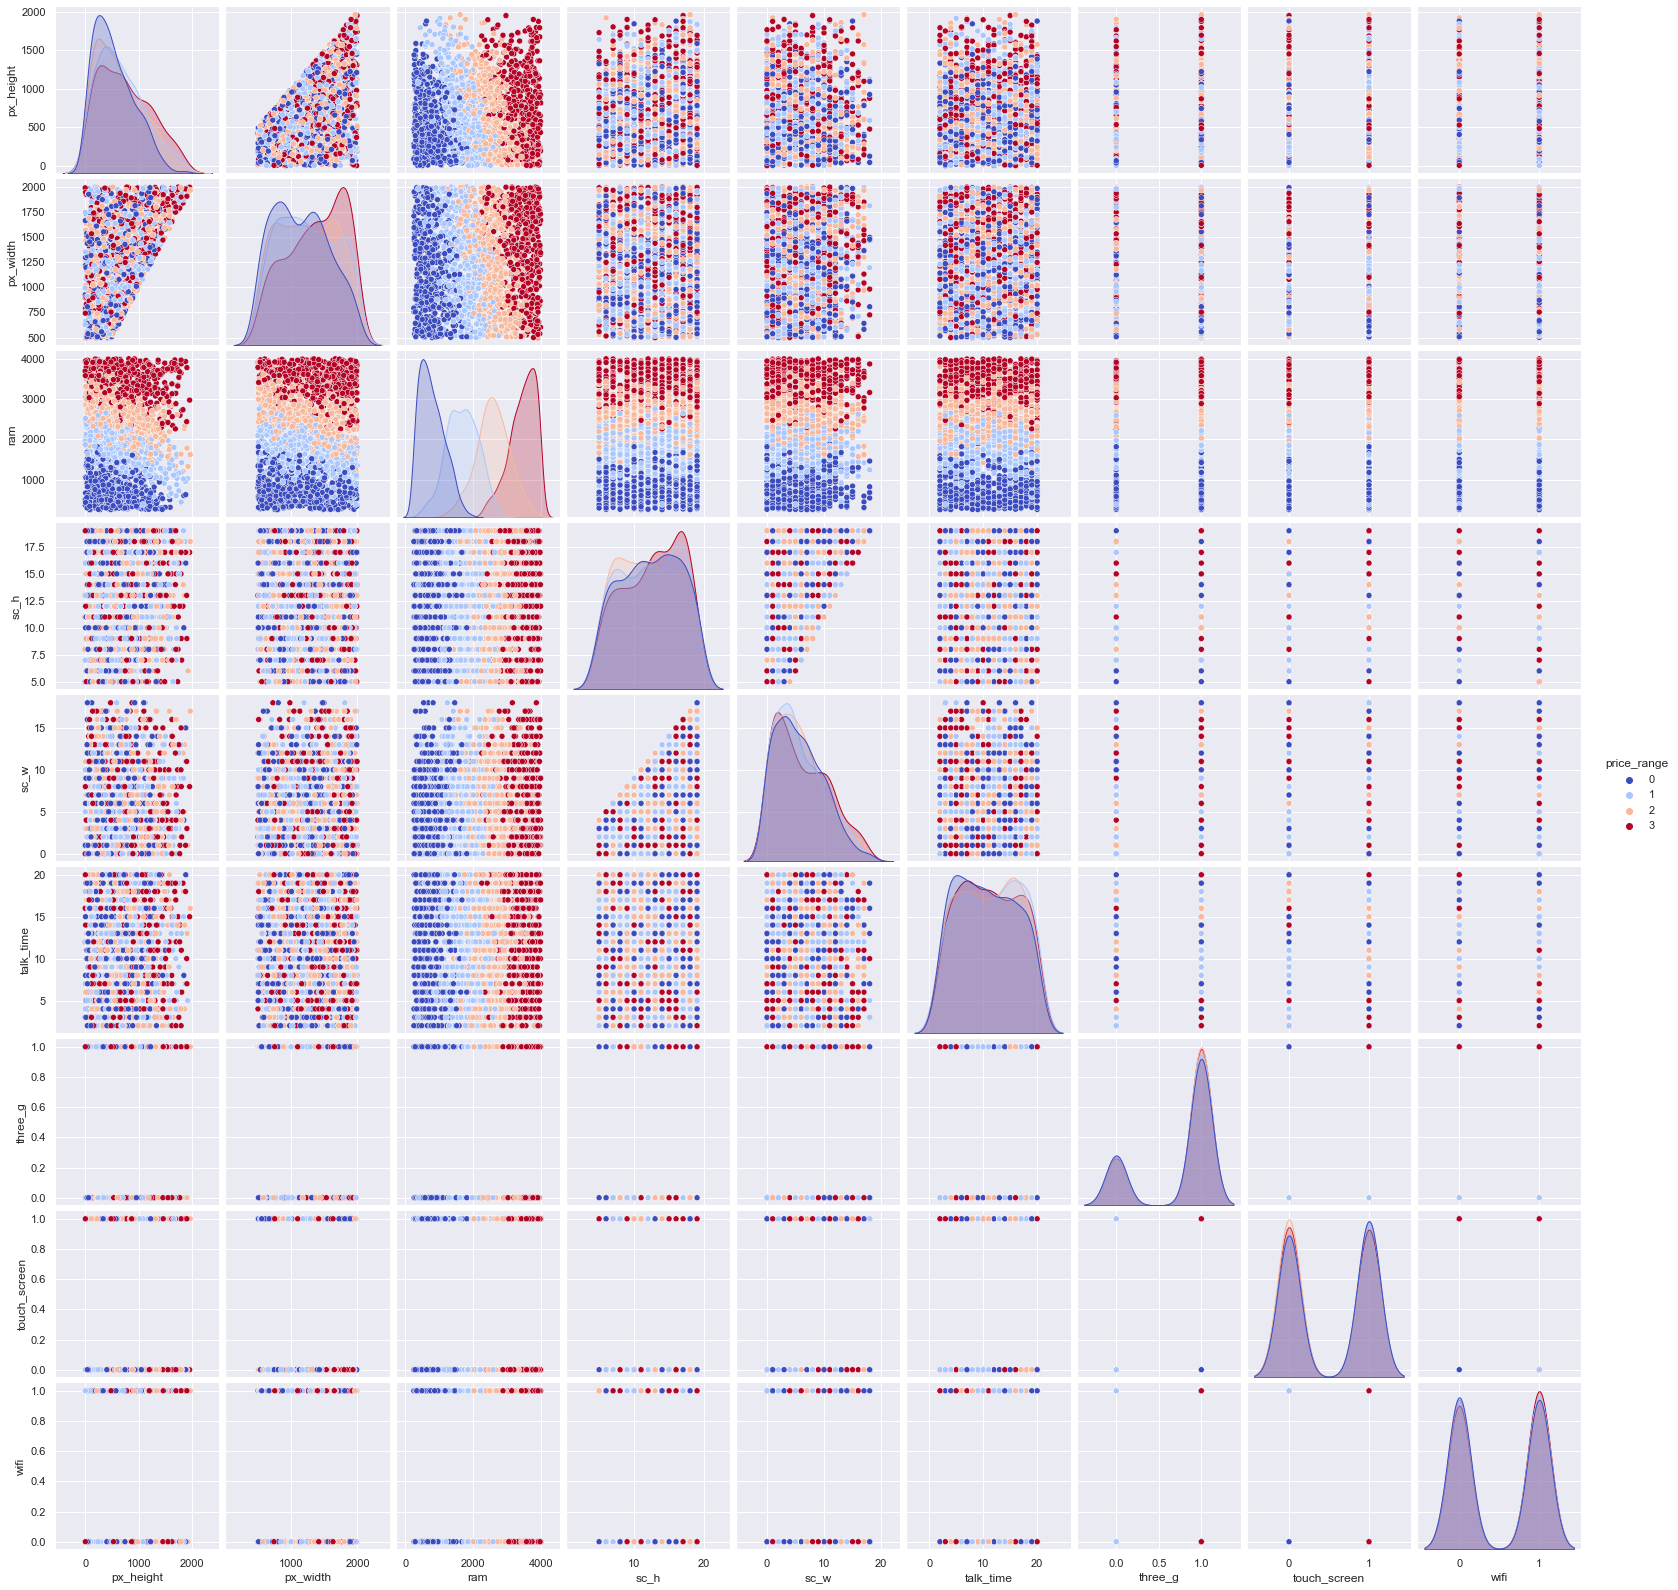

In [12]:
sns.pairplot(feature2,hue='price_range', palette='coolwarm')

### Check Imbalance Dataset

In [13]:
df.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

`The target variable explains the dataset is balanced. Therefore, I'll use Accuracy for the scoring of model`

# 3. Dataset Splitting

In [14]:
X = df.drop(columns="price_range")
y = df.price_range

# 4. Modeling

In [15]:
numeric = ['battery_power', 'clock_speed', 'fc','int_memory','m_dep', 'mobile_wt', 'n_cores','pc', 'px_height', 'px_width','ram', 'sc_h', 'sc_w', 'talk_time']
categoric = ['blue', 'dual_sim','four_g','three_g','touch_screen','wifi']

In [16]:
model = AutoClassifier(numeric, categoric)

In [17]:
model.fit(X, y, cv=3, scoring='accuracy')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
================== Best Model Info ==================
algo                      | LogisticRegression
algo__C                   | 656.9128640939186
algo__fit_intercept       | False

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=False, strategy='mean')
numerical_scaler          | StandardScaler

=========== Score ===========
Train: 0.9965621085812183
Valid: 0.9668741933746045
Test : 0.9725


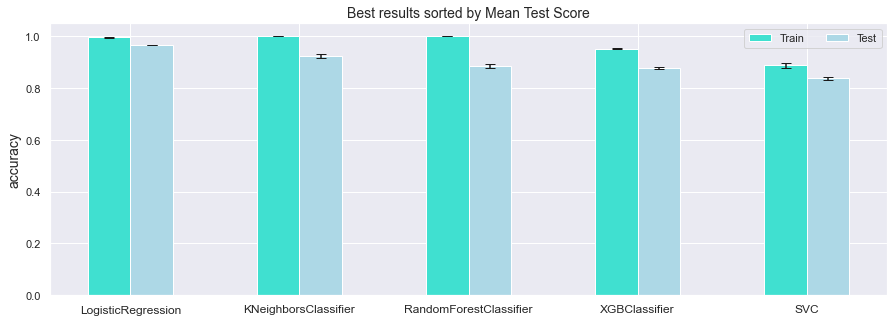

In [18]:
model.plot_results()

# 5. Features Importance

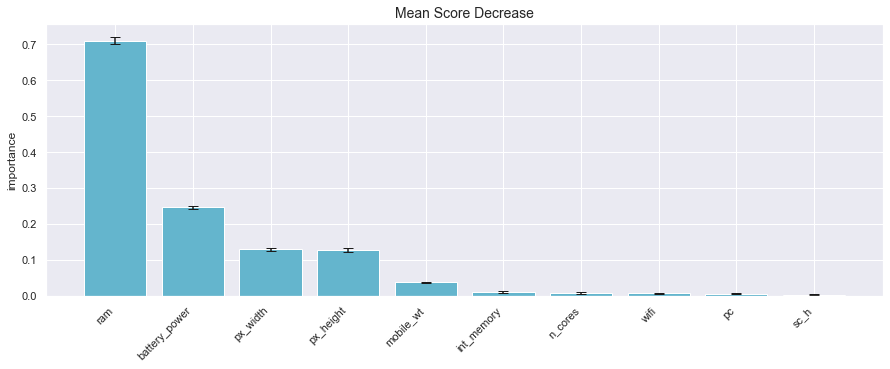

In [19]:
model.mean_score_decrease()

In [20]:
numeric = ['ram','battery_power','px_width','px_height','mobile_wt','int_memory','n_cores']
categoric = ['wifi']

In [21]:
model = AutoClassifier(numeric, categoric)

In [22]:
model.fit(X, y, cv=3, scoring='accuracy',  algo=['logreg'])

Fitting 3 folds for each of 50 candidates, totalling 150 fits
================== Best Model Info ==================
algo                      | LogisticRegression
algo__C                   | 34.05402589268694
algo__fit_intercept       | False

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=False, strategy='median')
numerical_scaler          | StandardScaler

=========== Score ===========
Train: 0.9815626917713919
Valid: 0.9756261521128607
Test : 0.99


# 6. Polynomial Feature

In [23]:
model.fit(X, y, cv=3, scoring='accuracy',  algo=['logreg'], poly= True)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
================== Best Model Info ==================
algo                      | LogisticRegression
algo__C                   | 65.04020246676579
algo__fit_intercept       | True

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=True, strategy='median')
numerical_scaler          | RobustScaler

=========== Score ===========
Train: 0.9818750941456499
Valid: 0.9756261521128607
Test : 0.99


# 7. Evaluation

In [24]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve

In [25]:
X_train = model.X_train
y_train = model.y_train
X_test = model.X_test
y_test = model.y_test

## 7.1. Classification Report

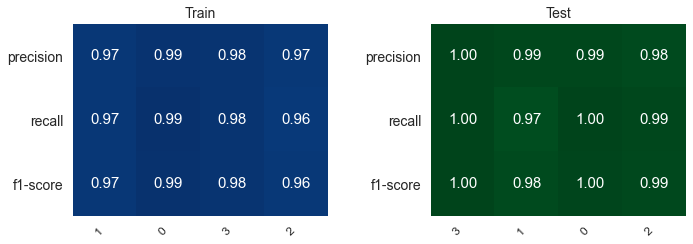

In [26]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

In [27]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.97      0.97      0.97       400
           2       0.97      0.96      0.96       400
           3       0.98      0.98      0.98       400

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


Test report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.99      0.97      0.98       100
           2       0.98      0.99      0.99       100
           3       1.00      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



## 7.2. Confusion Matrix

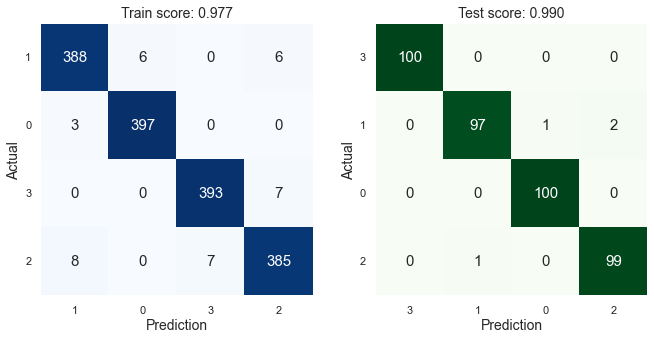

In [28]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model.model)

# 8. Save Model

In [29]:
model.save(fname='Mobile_Price_Classification_Baseline.pkl')

Model is pickled as model/Mobile_Price_Classification_Baseline.pkl
